# Global Behavior of Newton in 2D

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We start by defining our example-function $$ f(x,y) = (f_1(x,y),f_2(x,y)) : \mathbb{R}^2\to \mathbb{R}^2$$ and the corresponding Jacobian matrix.

In [2]:
f1 = lambda x,y: x**2 + y**2 - 1
f2 = lambda x,y: (x-y)*(x+y)*x*y
df1_dx = lambda x,y: 2*x
df1_dy = lambda x,y: 2*y
df2_dx = lambda x,y: y*(3*x**2-y**2)
df2_dy = lambda x,y: x*(x**2-3*y**2)

f = [[f1],[f2]]
jacobian = [[df1_dx, df1_dy],[df2_dx, df2_dy]]

Now we need to implement the Newton Method for 2D spaces:

In [3]:
def newton_2D(f,jacobian,x0,N):
    iterates = [x0]
    for k in range(N):
        jacobi = [[jacobian[0][0](x0[0][0],x0[1][0]),jacobian[0][1](x0[0][0],x0[1][0])],
                  [jacobian[1][0](x0[0][0],x0[1][0]),jacobian[1][1](x0[0][0],x0[1][0])]]
        jacobi_inv = np.linalg.inv(jacobi)
        f_vector = [[f[0][0](x0[0][0],x0[1][0])],[f[1][0](x0[0][0],x0[1][0])]]
        x0 = x0 - np.matmul(jacobi_inv, f_vector)
        iterates.append(x0)
    return iterates

Then we decide at which point $x_{0} \ \epsilon \ \mathbb{R}^2$ we want to start and how many Iterations $n$ we want to make. After that we use the Newton Method to get a series of length $n$.

In [4]:
#x0 = [[0.7],[0.2]] #looks like diverge but doesn't
#x0 = [[0.7],[0.3]] #looks like diverge but doesn't
x0 = [[0.6],[0.2]] #converge
n = 20

steps = newton_2D(f,jacobian,x0,n)
x_val = []
y_val = []
for i in range(len(steps)):
    x_val.append(steps[i][0])
    y_val.append(steps[i][1])

We know that the roots of $f$ are at the intersections of the roots of $f_{1}$ and the roots of $f_{2}$. Let's plot these sets and the series.

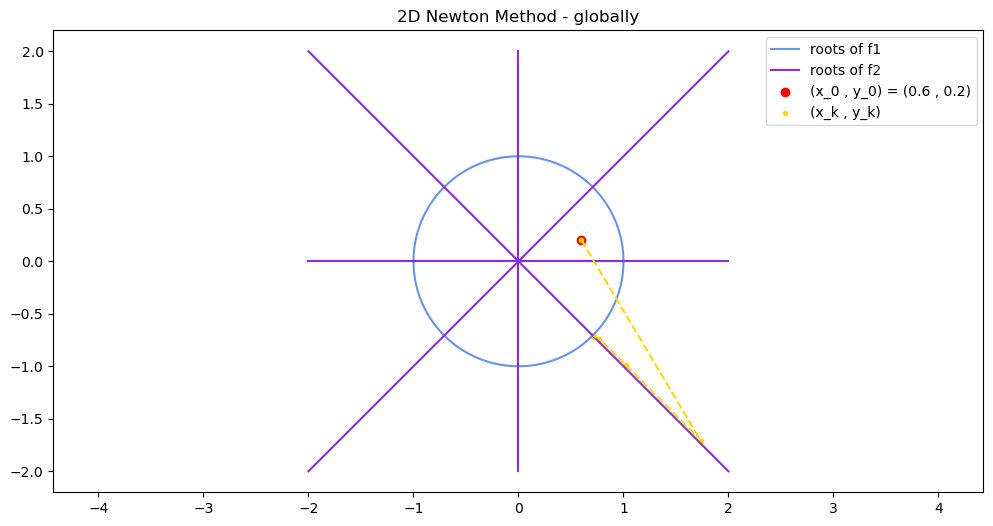

In [5]:
#first plot to show the roots of f=(f1,f2):
p = plt.figure()
p.set_figwidth(12)
p.set_figheight(6)

#plotting the roots of f1:
f1_roots = lambda x: np.sqrt((1-x**2))
array1 = np.linspace(-1,1,1000)
plt.plot(array1, f1_roots(array1), color='cornflowerblue', label='roots of f1')
plt.plot(array1, -f1_roots(array1), color='cornflowerblue')

#plotting the roots of f2:
array2 = np.linspace(-2,2,1000)
plt.plot(array2, [0 for i in array2], color='blueviolet', label='roots of f2')
plt.plot([0 for i in array2], array2, color='blueviolet')
plt.plot(array2, array2, color='blueviolet')
plt.plot(array2, [-i for i in array2], color='blueviolet')

#plotting the Newton Method
plt.scatter(x0[0], x0[1], color='red', label='(x_0 , y_0) = ('+str(x0[0][0])+' , '+str(x0[1][0])+')')
plt.scatter(x_val, y_val, marker='.', color='gold', label='(x_k , y_k)')
plt.plot(x_val, y_val, '--', color='gold')

plt.title('2D Newton Method - globally')
plt.axis('equal')
plt.legend()
plt.show()

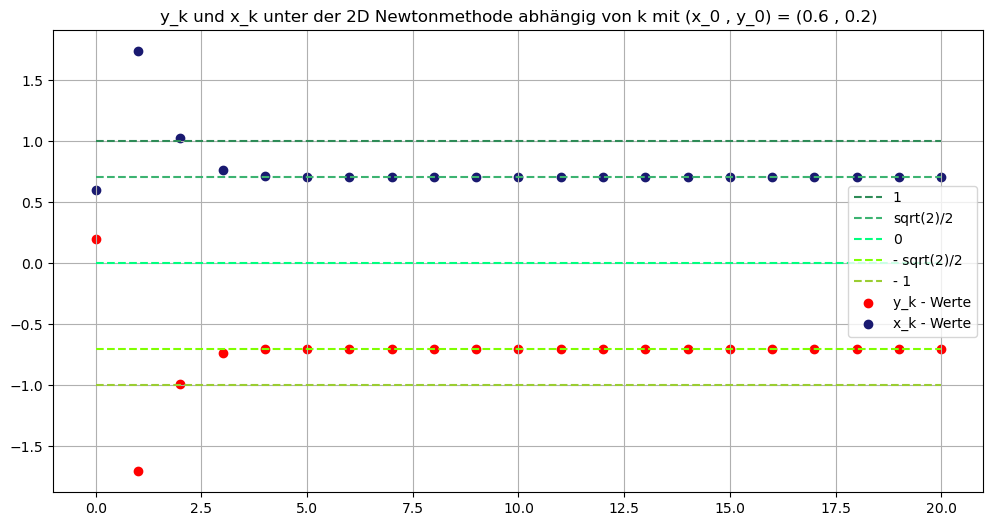

In [6]:
# second plot for the x_k- and y_k-values of our series
p = plt.figure()
p.set_figwidth(12)
p.set_figheight(6)

# we will also plot all possible values for x and y at which f has its roots to see more closely where (x_k,y_k) converges to
plt.plot([i for i in range(len(x_val))], [1 for i in range(len(x_val))], '--', color='seagreen', label='1')
plt.plot([i for i in range(len(x_val))], [np.sqrt(2)/2 for i in range(len(x_val))], '--', color='mediumseagreen', label='sqrt(2)/2')
plt.plot([i for i in range(len(x_val))], [0 for i in range(len(x_val))], '--', color='springgreen', label='0')
plt.plot([i for i in range(len(x_val))], [-np.sqrt(2)/2 for i in range(len(x_val))], '--', color='chartreuse', label='- sqrt(2)/2')
plt.plot([i for i in range(len(x_val))], [-1 for i in range(len(x_val))], '--', color='yellowgreen', label='- 1')

# now plot x_k and y_k depending on k
plt.scatter([i for i in range(len(y_val))], y_val, color='red', label='y_k - Werte')
plt.scatter([i for i in range(len(x_val))], x_val, color='midnightblue', label='x_k - Werte')

plt.title('y_k und x_k unter der 2D Newtonmethode abhängig von k mit (x_0 , y_0) = ('+str(x0[0][0])+' , '+str(x0[1][0])+')')
plt.legend()
plt.grid(True)
plt.show()

Lastly we want to take a look at which starting points converge to where. To do this we take a grid and put it through the newton method to see where all the points converge to. For every root of f we assign a different value and use plt.pcolormash() to plot it.

In [7]:
# n gives the number of iterations
# m gives the size of the grid (the bigger, the better the resolution in the plot)
# r gives the number of decimal places we round to when generating the grid
n = 15
m = 500
r = 4

# generate 2 mxm 2D grids for the x & y bounds
x, y = np.meshgrid(np.linspace(-3, 3, m), np.linspace(-1.5, 1.5, m))
# we fill this matrix 'grid' with different values depending where the startingpoint (x_i,y_j) converges to
grid = np.zeros((m,m)) 

for i in range(m):
    for j in range(m):
        newton = newton_2D(f,jacobian,[[x[i][j]],[y[i][j]]],n)[n]
        if round(newton[0][0],r) == 1 and round(newton[1][0],r) == 0:
            grid[i][j] = 1
        if round(newton[0][0],r) == round(np.sqrt(2)/2,r) and round(newton[1][0],r) == round(np.sqrt(2)/2,r):
            grid[i][j] = 2
        if round(newton[0][0],r) == 0 and round(newton[1][0],r) == 1:
            grid[i][j] = 3
        if round(newton[0][0],r) == round(-np.sqrt(2)/2,r) and round(newton[1][0],r) == round(np.sqrt(2)/2,r):
            grid[i][j] = 4
        if round(newton[0][0],r) == -1 and round(newton[1][0],r) == 0:
            grid[i][j] = 5
        if round(newton[0][0],r) == round(-np.sqrt(2)/2,r) and round(newton[1][0],r) == round(-np.sqrt(2)/2,r):
            grid[i][j] = 6
        if round(newton[0][0],r) == 0 and round(newton[1][0],r) == -1:
            grid[i][j] = 7
        if round(newton[0][0],r) == round(np.sqrt(2)/2,r) and round(newton[1][0],r) == round(-np.sqrt(2)/2,r):
            grid[i][j] = 8

In [8]:
from matplotlib import colors
cmap1 = colors.ListedColormap(['black', 'hotpink', 'red', 'orange', 'yellow', 'limegreen', 'turquoise', 'slateblue', 'mediumorchid'])

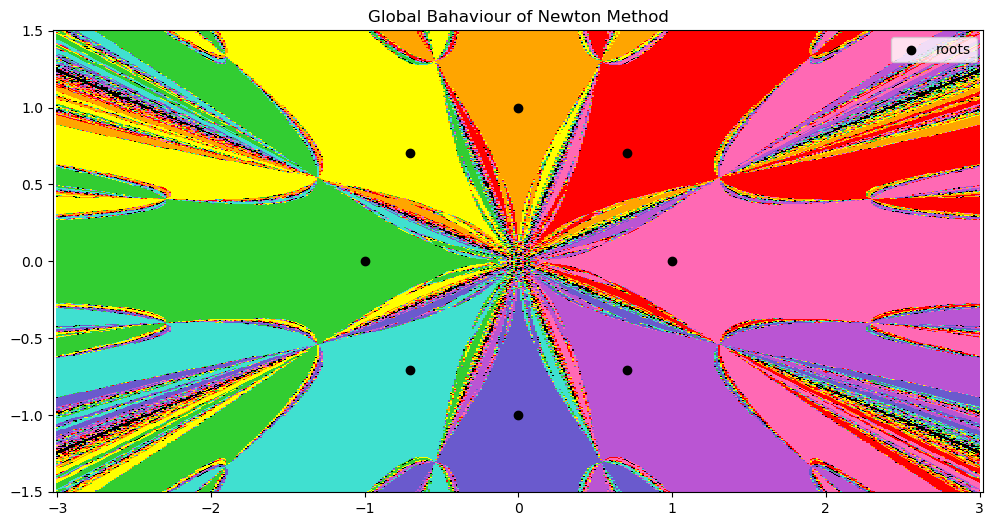

In [9]:
p = plt.figure()
p.set_figwidth(12)
p.set_figheight(6)

plt.pcolormesh(x,y,grid,cmap=cmap1)
plt.scatter([1,np.sqrt(2)/2,0,-np.sqrt(2)/2,-1,-np.sqrt(2)/2,0,np.sqrt(2)/2],
            [0,np.sqrt(2)/2,1,np.sqrt(2)/2,0,-np.sqrt(2)/2,-1,-np.sqrt(2)/2],
            color='black',label='roots')
plt.axis('equal')
plt.legend()
plt.title('Global Bahaviour of Newton Method')
plt.show()